# Case Study 3 : Data Mining in Image Data

**Dataset required in this case study:** 
* MNIST dataset


** NOTE **
* You can directly load the dataset from keras using: `from keras.datasets import mnist`
* You may need install tensorflow and keras first: https://keras.io/ 


# Problem: pick a data science problem that you plan to solve using the Data
* The problem should be important and interesting, which has a potential impact in some area.
* The problem should be solvable using the data and data science solutions.

Please briefly describe in the following cell: what problem are you trying to solve? why this problem is important and interesting?

The problem that I am going to tackle in this project is to classify each image into a number property. This has potential use in real life because classifying handwritten images would allow computers to accurately scan written text quickly which would make putting written information into computers more efficient. This is interesting because classifying images can be implemented in other situations as well, not just handwritten words/numbers. Types of fruit can be classified which could lead to supermarket implementing a scanner which scans the fruit and automatically puts it in the customers checkout bin. This would save time because the cashier would not have to manually put in the fruits number to put it in the checkout bin.

# Data Collection/Processing: 

In [1]:
from keras.datasets import mnist
import pandas as pd

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Data Exploration: Exploring the your data

**Plot some properties/statistics/distribution of your data** 

In [2]:
train_images.shape

(60000, 28, 28)

In [3]:
test_images.shape

(10000, 28, 28)

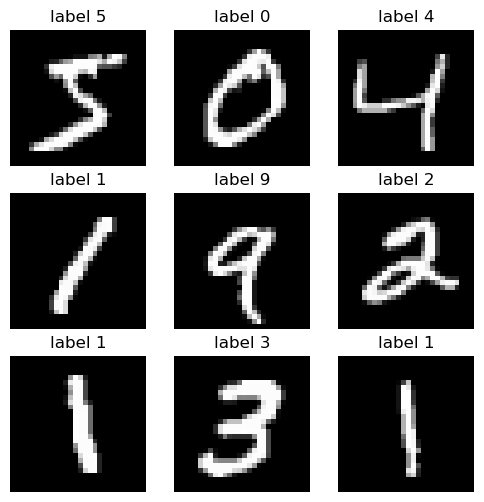

In [4]:
import matplotlib.pyplot as plt

#plot some of the images
plt.figure(figsize=(6, 6))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(train_images[i], cmap='gray')
    plt.title(f"label {train_labels[i]}")
    plt.axis('off')
plt.show()

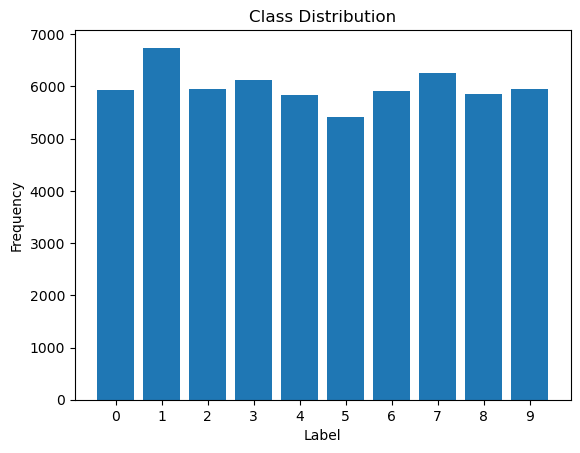

In [5]:
import numpy as np
# histogram of label frequencies

label_counts = np.bincount(train_labels)
plt.bar(range(10), label_counts)
plt.xlabel('Label')
plt.ylabel('Frequency')
plt.title('Class Distribution')
plt.xticks(range(10))
plt.show()

# The Solution: implement a data science solution to the problem you are trying to solve.

Briefly describe the idea of your solution to the problem in the following cell (please use at least 3 different deep learning models to solve your problem and compare the results):

To solve this problem I am going to create several deep learning models to see which one can classify the images the best. I will be using accuracy to determine which models performs the best on the testing set. The 1st and third models are different variations of convolutional neural networks but the second one is slightly more complex because it incorporates residual connections and batch normalization. The second model is a Multi-layer perception model. I am going to make an assumption that the last model will perform the best due to its high complexity that includes so many factors.

Write codes to implement the solution in python:

CNN neural network

In [6]:
import numpy as np
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.utils import to_categorical
from keras.datasets import mnist
(train_images_cnn, train_labels_cnn), (test_images_cnn, test_labels_cnn) = mnist.load_data()

#train test splits
train_images_cnn = train_images_cnn.reshape((train_images_cnn.shape[0], 28, 28, 1)).astype('float32') / 255
test_images_cnn = test_images_cnn.reshape((test_images_cnn.shape[0], 28, 28, 1)).astype('float32') / 255
train_labels_cnn = to_categorical(train_labels_cnn)
test_labels_cnn = to_categorical(test_labels_cnn)

# CNN model with relu, tanh, and softmax activation functions
model_cnn = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='tanh'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])
# adam optimizer and categorical crosspentropy loss function
model_cnn.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

# model training
model_cnn.fit(train_images_cnn, train_labels_cnn, epochs=5, batch_size=64, validation_split=0.1)
# evaluation
test_loss_cnn, test_acc_cnn = model_cnn.evaluate(test_images_cnn, test_labels_cnn)
print('accuracy', test_acc_cnn)




Epoch 1/5


844/844 [==============================] - 15s 16ms/step - loss: 0.1913 - accuracy: 0.9430 - val_loss: 0.0679 - val_accuracy: 0.9797
Epoch 2/5
844/844 [==============================] - 14s 16ms/step - loss: 0.0526 - accuracy: 0.9829 - val_loss: 0.0543 - val_accuracy: 0.9835
Epoch 3/5
844/844 [==============================] - 14s 16ms/step - loss: 0.0354 - accuracy: 0.9887 - val_loss: 0.0435 - val_accuracy: 0.9890
Epoch 4/5
844/844 [==============================] - 14s 17ms/step - loss: 0.0280 - accuracy: 0.9912 - val_loss: 0.0398 - val_accuracy: 0.9888
Epoch 5/5
313/313 [==============================] - 1s 4ms/step - loss: 0.0316 - accuracy: 0.9897
accuracy 0.9897000193595886


MLP neural network

In [7]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.datasets import mnist
from keras.utils import to_categorical
(train_images_mlp, train_labels_mlp), (test_images_mlp, test_labels_mlp) = mnist.load_data()

#train test splits
train_images_mlp = train_images_mlp.reshape((-1, 28*28)).astype('float32') / 255.0
test_images_mlp = test_images_mlp.reshape((-1, 28*28)).astype('float32') / 255.0
train_labels_mlp = to_categorical(train_labels_mlp)
test_labels_mlp = to_categorical(test_labels_mlp)

# MLP model with relu, tanh, and softmax activation functions
model_mlp = Sequential([
    Dense(512, activation='relu', input_shape=(28*28,)),
    Dense(256, activation='relu'),
    Dense(128, activation='tanh'),
    Dense(10, activation='softmax')
])
# adam optimizer and categorical_crossentropy loss function
model_mlp.compile(optimizer='adam',
                   loss='categorical_crossentropy',
                   metrics=['accuracy'])

# model training
model_mlp.fit(train_images_mlp, train_labels_mlp, epochs=10, batch_size=128, validation_split=0.1)

# model evaluation
test_loss_mlp, test_acc_mlp = model_mlp.evaluate(test_images_mlp, test_labels_mlp)
print('accuracy', test_acc_mlp)

Epoch 1/10
422/422 [==============================] - 6s 11ms/step - loss: 0.2281 - accuracy: 0.9310 - val_loss: 0.1252 - val_accuracy: 0.9632
Epoch 2/10
422/422 [==============================] - 4s 9ms/step - loss: 0.0856 - accuracy: 0.9738 - val_loss: 0.0838 - val_accuracy: 0.9752
Epoch 3/10
422/422 [==============================] - 4s 9ms/step - loss: 0.0526 - accuracy: 0.9830 - val_loss: 0.0842 - val_accuracy: 0.9753
Epoch 4/10
422/422 [==============================] - 4s 9ms/step - loss: 0.0391 - accuracy: 0.9877 - val_loss: 0.0790 - val_accuracy: 0.9758
Epoch 5/10
422/422 [==============================] - 4s 10ms/step - loss: 0.0293 - accuracy: 0.9903 - val_loss: 0.0933 - val_accuracy: 0.9748
Epoch 6/10
422/422 [==============================] - 4s 9ms/step - loss: 0.0238 - accuracy: 0.9920 - val_loss: 0.0706 - val_accuracy: 0.9798
Epoch 7/10
422/422 [==============================] - 4s 9ms/step - loss: 0.0204 - accuracy: 0.9930 - val_loss: 0.0757 - val_accuracy: 0.9812
Epoc

CNN neural network with residual connections

In [18]:
import numpy as np
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, BatchNormalization, Add
from keras.datasets import mnist
from keras.utils import to_categorical
(train_images_cnn2, train_labels_cnn2), (test_images_cnn2, test_labels_cnn2) = mnist.load_data()

# train and test splits
train_images_cnn2 = train_images_cnn2.reshape((-1, 28, 28, 1)).astype('float32') / 255.0
test_images_cnn2 = test_images_cnn2.reshape((-1, 28, 28, 1)).astype('float32') / 255.0
train_labels_cnn2 = to_categorical(train_labels_cnn2)
test_labels_cnn2 = to_categorical(test_labels_cnn2)

# CNN with residual connections
model_cnn2 = Sequential([
    Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)),
    Conv2D(32, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='tanh', padding='valid'),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    Conv2D(128, (3, 3), activation='tanh', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(256, activation='relu'),
    Dense(10, activation='softmax')
])
# adam optimizer and categorical_crossentropy loss function
model_cnn2.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# model training
model_cnn2.fit(train_images_cnn2, train_labels_cnn2, epochs=10, batch_size=128, validation_split=0.1)
# model evaluation
test_loss_cnn2, test_acc_cnn2 = model_cnn2.evaluate(test_images_cnn2, test_labels_cnn2)
print('accuracy', test_acc_cnn2)

Epoch 1/10
422/422 [==============================] - 64s 148ms/step - loss: 0.1243 - accuracy: 0.9628 - val_loss: 0.0928 - val_accuracy: 0.9713
Epoch 2/10
422/422 [==============================] - 63s 150ms/step - loss: 0.0401 - accuracy: 0.9875 - val_loss: 0.0468 - val_accuracy: 0.9855
Epoch 3/10
422/422 [==============================] - 63s 149ms/step - loss: 0.0279 - accuracy: 0.9909 - val_loss: 0.0334 - val_accuracy: 0.9910
Epoch 4/10
422/422 [==============================] - 63s 150ms/step - loss: 0.0215 - accuracy: 0.9929 - val_loss: 0.0764 - val_accuracy: 0.9800
Epoch 5/10
422/422 [==============================] - 64s 151ms/step - loss: 0.0215 - accuracy: 0.9930 - val_loss: 0.0383 - val_accuracy: 0.9910
Epoch 6/10
422/422 [==============================] - 63s 150ms/step - loss: 0.0192 - accuracy: 0.9937 - val_loss: 0.0340 - val_accuracy: 0.9922
Epoch 7/10
422/422 [==============================] - 64s 151ms/step - loss: 0.0158 - accuracy: 0.9952 - val_loss: 0.0256 - val_ac

# Results: summarize and visualize the results discovered from the analysis

Please use figures or tables to present the results.


313/313 [==============================] - 1s 4ms/step


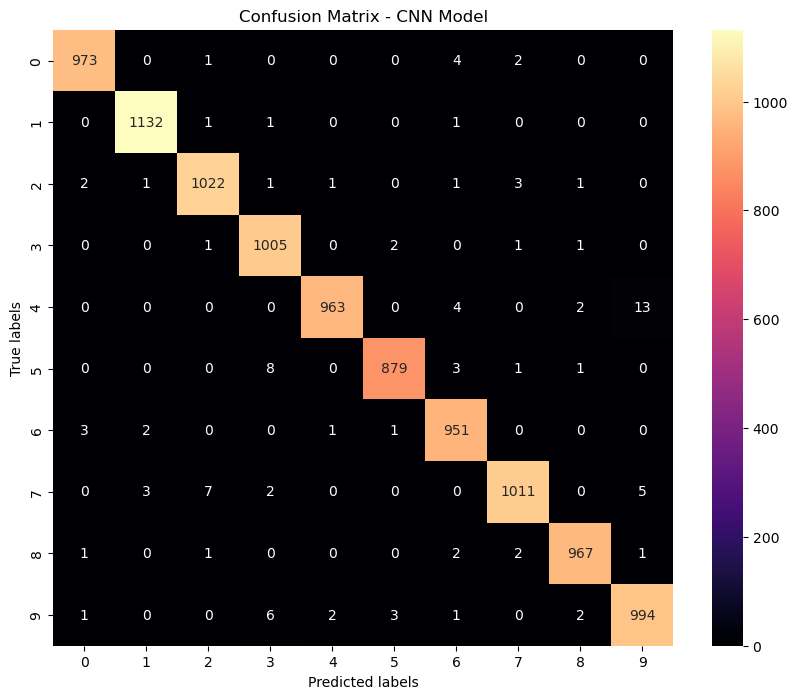

In [22]:
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


#create a confusion matrix based on the test set
test_predictions_prob_cnn = model_cnn.predict(test_images_cnn)
test_predictions_cnn = np.argmax(test_predictions_prob_cnn, axis=1)
conf_matrix_cnn = confusion_matrix(np.argmax(test_labels_cnn, axis=1), test_predictions_cnn)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_cnn, annot=True, fmt='d', cmap='magma')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix - CNN Model')
plt.show()

313/313 [==============================] - 1s 4ms/step


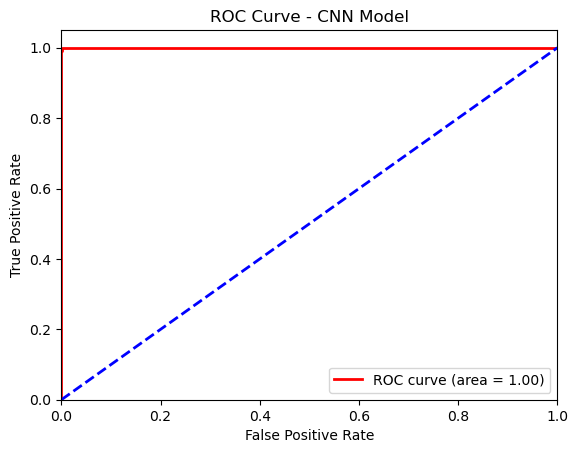

In [27]:
# ROC curve based on predictions
test_predictions_prob_cnn = model_cnn.predict(test_images_cnn)[:, 1]

fpr_cnn, tpr_cnn, thresholds_cnn = roc_curve(test_labels_cnn[:, 1], test_predictions_prob_cnn)

roc_auc_cnn = auc(fpr_cnn, tpr_cnn)

plt.figure()
plt.plot(fpr_cnn, tpr_cnn, color='red', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_cnn)
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - CNN Model')
plt.legend(loc="lower right")
plt.show()

313/313 [==============================] - 1s 2ms/step


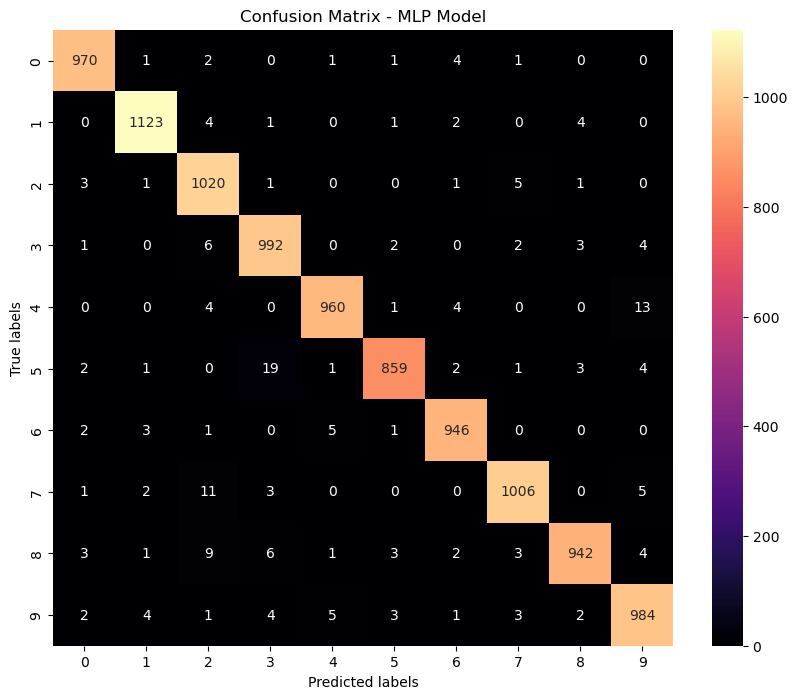

In [23]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

#create a confusion matrix based on the test set
test_predictions_prob_mlp = model_mlp.predict(test_images_mlp)
test_predictions_mlp = np.argmax(test_predictions_prob_mlp, axis=1)
conf_matrix_mlp = confusion_matrix(np.argmax(test_labels_mlp, axis=1), test_predictions_mlp)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_mlp, annot=True, fmt='d', cmap='magma')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix - MLP Model')
plt.show()

313/313 [==============================] - 1s 2ms/step


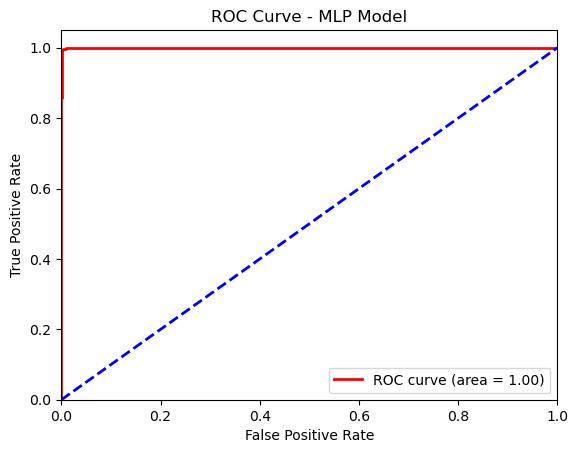

In [26]:
from sklearn.metrics import roc_curve, auc

# ROC Curve based on predictions
test_predictions_prob_mlp = model_mlp.predict(test_images_mlp)[:, 1]

fpr_mlp, tpr_mlp, thresholds_mlp = roc_curve(test_labels_mlp[:, 1], test_predictions_prob_mlp)
roc_auc_mlp = auc(fpr_mlp, tpr_mlp)

plt.figure()
plt.plot(fpr_mlp, tpr_mlp, color='red', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_mlp)
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - MLP Model')
plt.legend(loc="lower right")
plt.show()

313/313 [==============================] - 4s 12ms/step


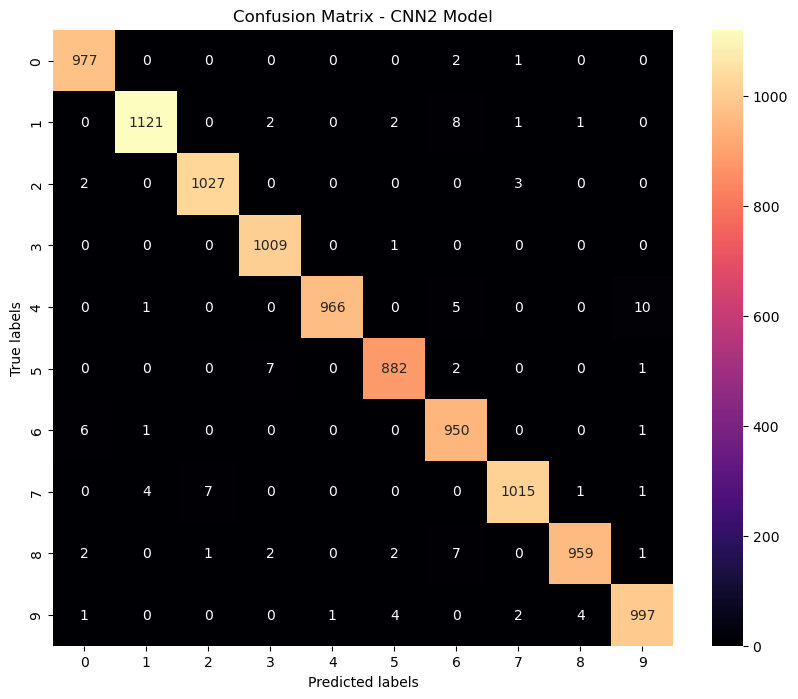

In [24]:
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
#create a confusion matrix based on the test set
test_predictions_prob_cnn2 = model_cnn2.predict(test_images_cnn2)
test_predictions_cnn2 = np.argmax(test_predictions_prob_cnn2, axis=1)
conf_matrix_cnn2 = confusion_matrix(np.argmax(test_labels_cnn2, axis=1), test_predictions_cnn2)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_cnn2, annot=True, fmt='d', cmap='magma')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix - CNN2 Model')
plt.show()

313/313 [==============================] - 4s 12ms/step


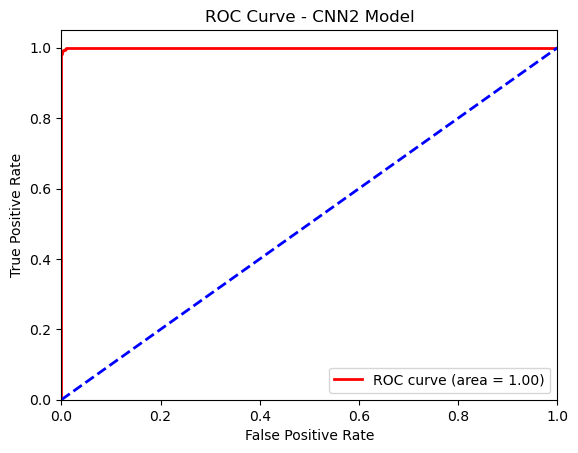

In [25]:
from sklearn.metrics import roc_curve, auc

# ROC curve based on predictions
test_predictions_prob_cnn2 = model_cnn2.predict(test_images_cnn2)[:, 1]
fpr_cnn2, tpr_cnn2, thresholds_cnn2 = roc_curve(test_labels_cnn2[:, 1], test_predictions_prob_cnn2)
roc_auc_cnn2 = auc(fpr_cnn2, tpr_cnn2)

plt.figure()
plt.plot(fpr_cnn2, tpr_cnn2, color='red', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_cnn2)
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - CNN2 Model')
plt.legend(loc="lower right")
plt.show()

*-----------------
# Done

All set! 

** What do you need to submit?**

* **Notebook File**: Save this Jupyter notebook, and submit it in BrightSpace.Please make sure all the plotted tables and figures are in the notebook.